## 1. 데이터 분석을 위한 `위치 추정`과 `범위 추정`
- 탐색적 데이터 분석의 세 번째, feature 분석을 위한 기본 탐색
  - **위치 추정**: 방대한 데이터의 대푯값을 구해서, 해당 feature의 일종의 요약 정보 도출
    - 보통은 `평균`을 쓰면 되며(물론 평균이 가장 좋은 대푯값이 아닌 경우도 많음), 특정 튀는 수치가 있을 때만 조정해도 충분합니다!
  - **변이 추정**: 방대한 데이터의 분포 (밀집해 있는지, 퍼져 있는지)를 알아내어, 역시 해당 feature의 일종의 요약 정보 도출
    - 수학에서 익힌 `표준편차`, `분산`이 대표적인 분포 확인 값

> 가볍게 꼭 들어봤어야 할 만한 사항들을 정리하기<br>
> **복잡한 수치를 쓸 경우, 오히려 현업에서는 관련된 모든 사람들이 이해할 수 없게 되어, 커뮤니케이션에 문제가 됨** <br>
> 분석된 데이터의 결과는 개발자/데이터과학자들끼리 커뮤니케이션하는 경우보다, 마케팅/영업등 타직군과 커뮤니케이션하는 경우가 더 많기 때문임

### **1.1** 위치 추정
- feature를 대표할 수 있는 대푯값을 찾는 것

#### **평균 (mean)**
- 모든 값을 갯수로 나눈 값

#### **가중 평균 (weighted mean)**
- 데이터값($x_i$) X 가중치($w_i$) 의 총 합을 다시 가중치($w_i$)의 총합으로 나눈 것
- 예: 여러 기기로부터 가져온 데이터 중, 특정 기기는 신뢰도가 떨어질 경우, 해당 기기로부터 나온 데이터에는 가중치를 낮게 줌

#### **중간값 (median) (가중 중간값도 가능)**
- 데이터를 정렬한 후 중간에 위치한 값을 취함
- 평균은 특잇값(outlier)에 큰 영향을 받으므로, 특잇값에 큰 영향을 받지 않도록 중간값을 활용할 수 있음

#### **절사평균 (trimmed mean)**
- 데이터를 정렬한 후, 양끝에서 일정 개수의 값들을 빼고, 남은 데이터를 기반으로 평균을 계산
- 즉, 특잇값을 평균을 구할 때 제외하는 것임


> `EDA` 에서는 `중간값`(또는 중앙값이라고도 불리움)을 평균보다 중요하게 사용 (중간값은 특잇값의 영향을 받지 않기 때문임)

### **1.2** 변이 추정

#### **분산(variance)**
- 평균과 각 데이터간의 차를 제곱한 값들의 합을 데이터 갯수로 나눈 값
$$ \begin{align}
\sigma^2 = \dfrac{\sum_{i = 1}^{N} (x_i - \mu)^2}{N}
\end{align} $$

- $ \sigma^2 $ : 모분산 (깊게 들어가면 샘플분산은 n - 1 로 나누지만, 분산의 형태만 간략히 참고로 알아두기로 함)
- $ \mu $ : 평균
- $ N $ : 데이터 갯수
- $ x_i $ : i 번째 데이터

#### **표준편차(standard deviation)**
- 분산은 수치가 너무 커서, 분산의 제곱근 (루트를 씌운 값)
- $ \sigma $ : 모표준편차 (깊게 들어가면 샘플표준편차는 샘플분산이 n 이 아닌, n - 1 로 나눈 값이므로 이를 제곱근한 값)

### **1.3** 위치 추정, 범위 추정 값 구하는 방법
- `describe()` 사용

In [16]:
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5, 6],
    'B': [1, 2, 3, 4, 5, 100]
})
df

A    B
0  1    1
1  2    2
2  3    3
3  4    4
4  5    5
5  6  100

In [18]:
df.describe()

A           B
count  6.000000    6.000000
mean   3.500000   19.166667
std    1.870829   39.625329
min    1.000000    1.000000
25%    2.250000    2.250000
50%    3.500000    3.500000
75%    4.750000    4.750000
max    6.000000  100.000000

> mean, std, 50% 값을 알 수 있음

## 2. 보다 빠른 분석을 위한 데이터 분류의 이해
- 데이터를 분석, 시각화, 예측하는 전반적인 과정에서 데이터에 대한 큰 그림을 이해하는 것이 도움이 됨

### **2.1** 데이터의 분류
- 데이터는 크게 `수치형`, `범주형` 데이터로 나눌 수 있음

#### **2.1.1** 수치형 데이터
- `연속형(continuous) 데이터`: 특정한 범위 안에 어떤 값(정수와 부동소숫점)이든 가질 수 있는 데이터
- `이산(discrete) 데이터`: 횟수와 같은 정수만 가질 수 있는 데이터

#### **2.1.2** 범주형 데이터
- `명목형(nominal) 데이터`: 카테고리, 타입, 항목등 데이터 분류를 위해 이미 정해진 값이 있는 데이터, 데이터가 가질 수 있는 값을 수준(levels) 라고 부름
    - 이진(binary) 데이터: True or False, 0 or 1 과 같이 이미 정해진 두 값만 있는 데이터 <br>

- `순서형(ordinal) 데이터`: 이미 정해진 값 사이의 순서 관계가 있는 데이터
    - 매우불만(1) ~ 매우만족(5)와 같이 분류된 값 사이에 순서가 있는 경우
      <img src='https://www.fun-coding.org/00_Images/ordinal.jpg'>

> 1반(1), 2반(2), 3반(3)을 나타내는 데이터가 있다면? <br>
>  - 1보다 2가 더 좋거나, 더 큰 의미를 가지는 것이 아니므로, 명목형 데이터라고 봐야 함

## 3. 수치형 데이터의 요약 (EDA)

#### **3.1** 다섯 수치 요약 (5 number summary) 확인하기
   - `최소값(minimum)`, `제1사분위수`, 중간값(mediam)=`제2사분위수`, `제3사분위수`, `최대값(maximum)` 확인하기
   - 분위수(quartile)
     - 자료 크기 순서에 따른 위치값(경계값)
   - EDA 에서는 사분위수를 사용
     - Q1: 제1사분위수 (25%에 해당하는 값)
     - Q2: 제2사분위수 (50%에 해당하는 값, 중간값)
     - Q3: 제3사분위수 (75%에 해당하는 값)
     - Q4: 제4사분위수 (100%에 해당하는 값, 최대값)

#### **3.2** 평균과 중간값
- 평균은 이상치 특잇값(outlier)에 큰 영향을 받음
- EDA 에서는 특잇값에 큰 영향을 받지 않는 중간값을 선호

> 그래서 다섯 수치 요약 (5 number summary) 에 평균값이 없음

#### **3.3** 이상치 특잇값 (극단값, outlier)
- 대부분의 값과 매우 다른 값
- 다양한 특잇값 검출 기법이 있긴 하지만, 주관적인 측면이 강하므로 데이터 탐색을 통해, 확인하는 것이 가장 좋음

#### **3.4** 중간값 계산 방법
- 데이터가 홀수개 있다면, 중간에 위치한 값을 채택
- 데이터가 짝수개 있다면, 중간에 위치한 두 값의 평균을 선택
> 예: 위 예에서 3과 4의 평균이 3.5

## 4. `분석 타입에 따른 그래프 종류 이해`: 다섯 수치 요약 (5 number summary)과 특잇값 확인
- 상자 그래프 (boxplot)
<center>
<img src="https://www.fun-coding.org/00_Images/boxplot.jpg" width=350>
</center>

In [45]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5, 6],    
    'B': [1, 2, 3, 4, 5, 100]
})
df

A    B
0  1    1
1  2    2
2  3    3
3  4    4
4  5    5
5  6  100

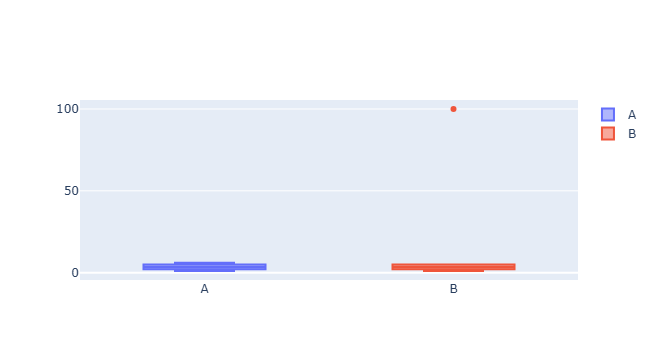

In [47]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Box(
        y=df['A'], name='A'
    )
)
fig.add_trace(
    go.Box(
        y=df['B'], name='B'
    )
)
fig.show()

## 5. `분석 타입에 따른 그래프 종류 이해`: 수치형 데이터 분포를 확인하기 위한 시각화
- `도수분포표 (frequency table)`: 수치형 데이터를 구간으로 나눠서 각 구간에 속하는 데아터의 갯수를 나타내는 표
- `히스토그램 (histogram) 그래프`: 도수 분포표를 시각적으로 표현한 그래프

In [57]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.rand(100000, 1), columns=['A'])
df.head()

A
0  0.858129
1  0.959609
2  0.398791
3  0.753752
4  0.430601

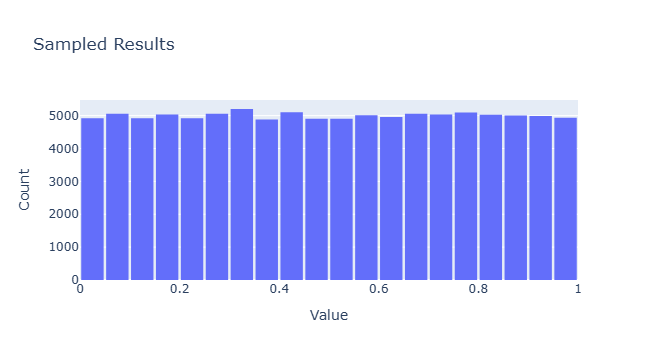

In [63]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Histogram(
        x=df['A'], name='A',
            xbins=dict(
                start=0,
                end=1.0,
                size=0.05
            )
    )
)
fig.update_layout(
    title_text='Sampled Results',
    xaxis_title_text='Value',
    yaxis_title_text='Count',
    bargap=0.1 # 보기 좋게 bar 사이에 간격 조정
)
fig.show()

<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">

## 수치형 데이터인 경우?
1. 다섯 수치 요약 확인하기 `describe() 사용`
2. 다섯 수치 요약으로 데이터 분포 파악이 잘 안 된다면? `boxplot` 그려서 분포 파악하기
3. `히스토그램` 그려서 분포 확인하기
> 이렇게 하면 feature를 좀 더 자세하게 이해할 수 있음

</div>

<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">

## 6. 범주형 데이터의 요약 (EDA)
1. 수준별로 데이터 분류하기
2. 수준별로 데이터 갯수 세기 (count)
    - 절대빈도: 절대 갯수
    - 상대빈도: 각 수준의 비율(%)
3. 시각화하기 (빈도표, frequency table)

</dir>

#### **6.1** 수준별로 데이터 분류하기

In [85]:
import pandas as pd

data = {
    'year': ['2017', '2017', '2019', '2020', '2021', '2021'],
    'grade': ['C', 'C', 'B', 'A', 'B', 'E'],     
}

# 범주형 데이터
df = pd.DataFrame(data)

In [81]:
df1 = df.groupby('year').count()
df1

grade
year       
2017      2
2019      1
2020      1
2021      2

In [83]:
df2 = df.groupby('grade').count()
df2

year
grade      
A         1
B         2
C         2
E         1

#### **6.2** 수준별로 데이터 갯수 세기 (count)
- `size` : 사이즈 반환
- `count()` : 데이터가 없는 경우를 뺀 사이즈 반환
- `unique()`: 유일한 값만 반환
- `value_counts()`: 데이터가 없는 경우를 제외하고, 각 값의 갯수를 반환

In [88]:
df['year'].value_counts()

year
2017    2
2021    2
2019    1
2020    1
Name: count, dtype: int64

In [90]:
df['year'].size

6

In [92]:
df['year'].unique()

array(['2017', '2019', '2020', '2021'], dtype=object)

In [94]:
df['year'].count()

6

## 7. `분석 타입에 따른 그래프 종류 이해`: 범주형 데이터 분석을 위해 주로 사용되는 그래프 종류
- 막대 그래프 (절대 빈도)
- 원 그래프 (상대 빈도)

#### **7.1** 막대 그래프

In [99]:
df1

grade
year       
2017      2
2019      1
2020      1
2021      2

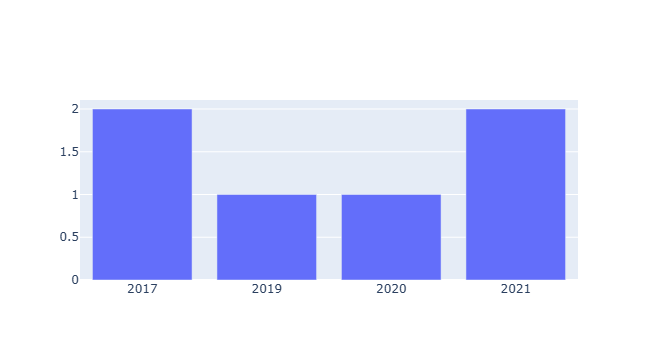

In [101]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df1.index, y=df1['grade']
    )
)
fig.show()

#### **7.2** 원 그래프

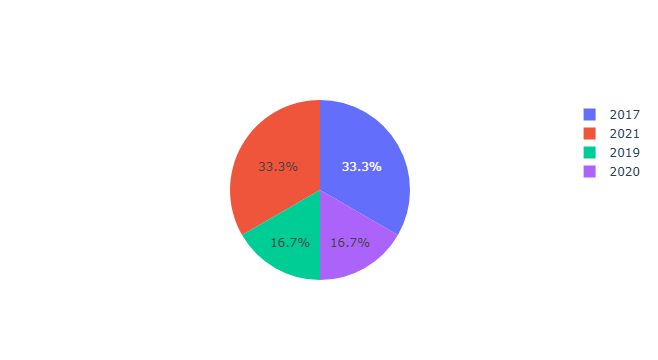

In [104]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Pie(
        labels=df1.index, values=df1['grade']
    )
)
fig.show()